In [1]:
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json',['id', 'authors', 'categories', 'update_date','authors_parsed'])

In [3]:
data

,authors,authors_parsed,categories,id,update_date
0,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...","[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",hep-ph,0704.0001,2008-11-26
1,Ileana Streinu and Louis Theran,"[[Streinu, Ileana, ], [Theran, Louis, ]]",math.CO cs.CG,0704.0002,2008-12-13
2,Hongjun Pan,"[[Pan, Hongjun, ]]",physics.gen-ph,0704.0003,2008-01-13
3,David Callan,"[[Callan, David, ]]",math.CO,0704.0004,2007-05-23
4,Wael Abu-Shammala and Alberto Torchinsky,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",math.CA math.FA,0704.0005,2013-10-15
5,Y. H. Pong and C. K. Law,"[[Pong, Y. H., ], [Law, C. K., ]]",cond-mat.mes-hall,0704.0006,2015-05-13
6,"Alejandro Corichi, Tatjana Vukasinac and Jose ...","[[Corichi, Alejandro, ], [Vukasinac, Tatjana, ...",gr-qc,0704.0007,2008-11-26
7,Damian C. Swift,"[[Swift, Damian C., ]]",cond-mat.mtrl-sci,0704.0008,2009-02-05
8,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","[[Harvey, Paul, ], [Merin, Bruno, ], [Huard, T...",astro-ph,0704.0009,2010-03-18
9,Sergei Ovchinnikov,"[[Ovchinnikov, Sergei, ]]",math.CO,0704.0010,2007-05-23


统计所有作者姓名出现频率的Top10；
统计所有作者姓（姓名最后一个单词）的出现频率的Top10；
统计所有作者姓第一个字符的评率；

In [4]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

In [5]:
data2

,authors,authors_parsed,categories,id,update_date
1266,"Laurence Likforman-Sulem, Abderrazak Zahour, B...","[[Likforman-Sulem, Laurence, ], [Zahour, Abder...",cs.CV,0704.1267,2007-05-23
3634,Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...,"[[Nelwamondo, Fulufhelo Vincent, ], [Marwala, ...",cs.CV cs.IR,0704.3635,2007-05-23
4201,"Erik Berglund, Joaquin Sitte","[[Berglund, Erik, ], [Sitte, Joaquin, ]]",cs.NE cs.AI cs.CV,0705.0199,2007-05-23
4216,"Mourad Zerai, Maher Moakher","[[Zerai, Mourad, ], [Moakher, Maher, ]]",cs.CV,0705.0214,2007-05-23
4451,"Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...","[[Marteau, Pierre-François, , VALORIA], [Ménie...",cs.CV,0705.0449,2007-05-23
4783,Jonathan M.Spiller and T. Marwala,"[[Spiller, Jonathan M., ], [Marwala, T., ]]",cs.CV,0705.0781,2007-05-23
4830,"D.L. Falk, D. M. Rubin and T. Marwala","[[Falk, D. L., ], [Rubin, D. M., ], [Marwala, ...",cs.CV,0705.0828,2007-05-23
4954,Dhiresh R. Surajpal and Tshilidzi Marwala,"[[Surajpal, Dhiresh R., ], [Marwala, Tshilidzi...",cs.CV,0705.0952,2007-05-23
5676,"Lukasz A Machowski, Tshilidzi Marwala","[[Machowski, Lukasz A, ], [Marwala, Tshilidzi, ]]",cs.CE cs.CV,0705.1674,2007-05-23
6013,"Alex Graves, Santiago Fernandez, Juergen Schmi...","[[Graves, Alex, ], [Fernandez, Santiago, ], [S...",cs.AI cs.CV,0705.2011,2007-05-23


# 统计所有作者姓名出现频率的Top10

Text(0.5, 0, 'Count')

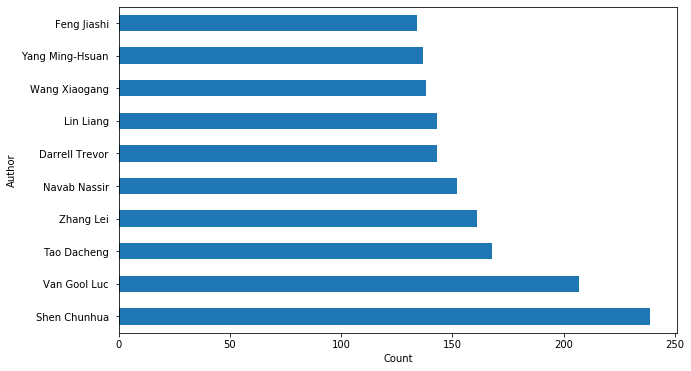

In [6]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

# 统计所有作者姓（姓名最后一个单词）的出现频率的Top10

Text(0.5, 0, 'Count')

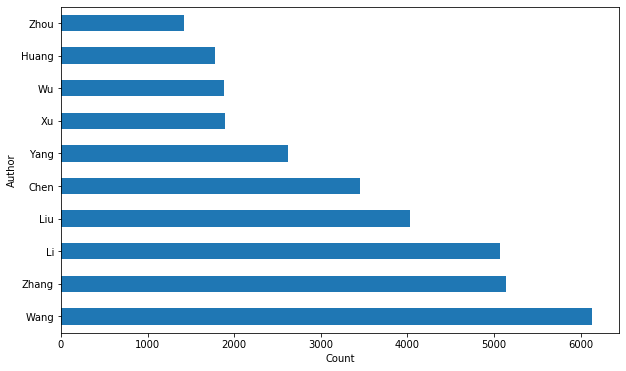

In [7]:

authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

# 统计所有作者姓第一个字符的评率

In [8]:
authors_first_letter = [x[0][0:1] for x in all_authors]
#print(authors_first_letter)
authors_first_letter = pd.DataFrame(authors_first_letter)
#print(authors_first_letter)

Text(0.5, 0, 'Count')

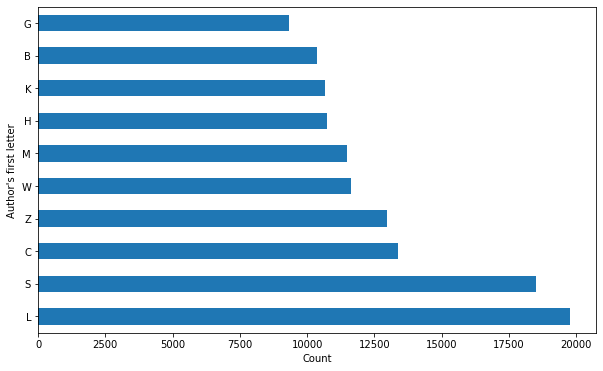

In [9]:

plt.figure(figsize=(10, 6))
authors_first_letter[0].value_counts().head(10).plot(kind='barh')

first_letter = authors_first_letter[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(first_letter)), first_letter)
plt.ylabel('Author\'s first letter')
plt.xlabel('Count')

# 找出 year 中2016年以后的数据

In [14]:
data3 = data[data['year'] >= 2016] #找出 year 中2016年以后的数据，
data3 = data3[data3['categories'].apply(lambda x : 'cs.CV' in x)]
data3.head() #查看结果

,authors,authors_parsed,categories,id,year
7671,Donald A. Sofge,"[[Sofge, Donald A., ]]",cs.NE cs.CV cs.SD,0705.3669,2016
27683,David A Kay (Oxford University Computational L...,"[[Kay, David A, , Oxford University Computatio...",cs.CV cs.NA,0710.0736,2018
33676,Philip B. Alipour,"[[Alipour, Philip B., ]]",cs.CV cs.CE,0711.0784,2016
40791,"Hari Palaiyanur, Cheng Chang and Anant Sahai","[[Palaiyanur, Hari, ], [Chang, Cheng, ], [Saha...",cs.IT cs.CV math.IT,0712.2870,2016
48709,Mahesh Pal,"[[Pal, Mahesh, ]]",cs.NE cs.CV,0802.1412,2019


In [15]:
first_author = []
for s in data3['authors_parsed']: 
  first_author.append(s[0])
len(first_author)

43723

In [18]:
first_author_1 = []
for s in first_author:
  tep = ''
  for j in range(len(s)):
    tep = tep  + ' ' + s[j]
    tep.rstrip() #去除字符串右边的空格
  first_author_1.append(tep)

In [19]:
first_author_names = pd.DataFrame(first_author_1)
first_author_names

,0
0,Sofge Donald A.
1,Kay David A Oxford University Computational ...
2,Alipour Philip B.
3,Palaiyanur Hari
4,Pal Mahesh
5,Bao Forrest Sheng
6,Mokhov Serguei A. for the MARF R&D Group
7,Sakai Tomoya
8,Chaudhury Kunal Narayan
9,Michailovich Oleg


Text(0.5, 1.0, 'Top 10 authors in the number of papers in the CV field since 2015 (first author)')

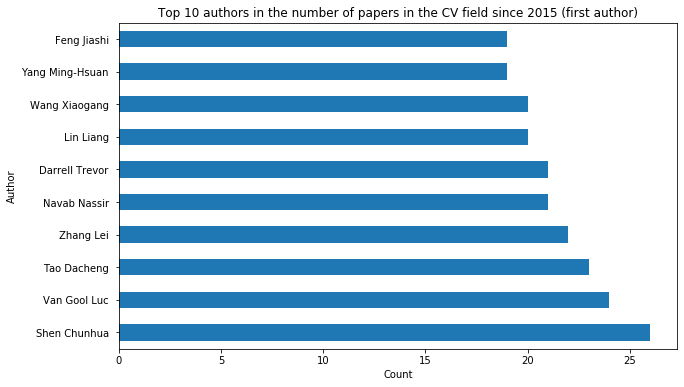

In [20]:

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
first_author_names[0].value_counts().head(10).plot(kind='barh')
# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.title('Top 10 authors in the number of papers in the CV field since 2016 (first author)')

In [23]:
first_author_lastname = []
for s in first_author:
  first_author_lastname.append(s[0])

In [24]:

first_author_last_name = pd.DataFrame(first_author_lastname)

Text(0.5, 1.0, "The top 10 last names in the number of papers in the CV field since 2015(first Author's last names)")

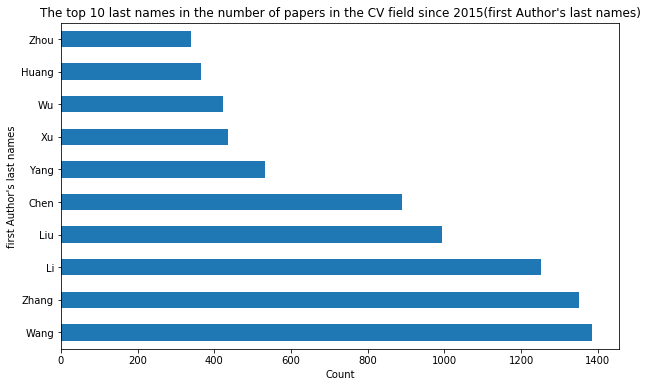

In [25]:
plt.figure(figsize=(10, 6))
first_author_last_name[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('first Author\'s last names')
plt.xlabel('Count')
plt.title('The top 10 last names in the number of papers in the CV field since 2016(first Author\'s last names)')